# CS 109A/AC 209A/STAT 121A Data Science: Homework 2
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 21st, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW2.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**


Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [3]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.linear_model import LinearRegression as Lin_Reg
from bisect import bisect_left
import math
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Tarazi, Ramez]

### Part (b): Course Number

[CS 109a]

### Part (c): Who did you work with?

None

---

## Problem 1: Inside the Models in Scikit-learn

In this problem, we will be implementing K-Nearest Neighbour and simple linear regression for predicting a quantitative variable. We will compare the performance of our implementation with those of Scikit-learn (``sklearn``).

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y. 

### Part (a): Implement the models by hand
In this part you **may not** use ``sklearn`` for any task.

In the following, you may use ``numpy`` arrays instead of ``pandas`` dataframes.

- Implement a funtion ``split``, which satifies:
    - input: an ``nx2`` dataframe ``data``, a float ``m``
    - return: an ``nx2`` dataframe ``train`` and an ``nx2`` dataframe ``test``, consisting of ``m`` percent and ``100 - m`` percent of the data, respectively.


- Implement K-Nearest Neighbour for predicting a quantitative variable. That is, write a function, ``knn_predict``, that satisfies:
    - input: an integer ``k``, an ``n x 2`` dataframe training set ``train``, an ``n x 1`` dataframe testing set ``test``
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.



- Implement linear regression for predicting a quantitative variable. That is, write a function ``linear_reg_fit`` that satisfies:
    - input: an ``nx2`` dataframe training set ``train``
    - return: the coefficients of the linear regression model - a float ``slope`` and a float ``intercept``.
    
    
- Write a function ``linear_reg_predict`` that satisfies:
    - input: an ``nx1`` dataframe testing set ``test``, as well as the coefficients of the linear regression model
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.
    
    
- Implement a function ``score`` that satisfies:
    - input: an ``nx2`` dataframe ``predicted``, an ``nx2`` dataframe ``actual`` 
    - return: R^2 coefficient of the fit of the predicted values.

**Solution:**

In [3]:
def split(nx2, m):
    length_train=int(len(nx2.index)*m)
    m=(1-m)
    train = nx2[0:length_train]
    test = nx2[length_train:len(nx2.index)]
    return train, test, m

In [4]:
def knn_predict(train,test,k):
    #sorted_train=train.sort_values(['x','y'],ascending = True)
    predicted=test
    #plt.scatter(sorted_train.x, sorted_train.y)
    #plt.show()
    for index, item in test.x.iteritems():
        train_list=train['x'].tolist()
        closest_list = []
        #print 'Current test:',index, item
        #print train_list
        for i in range(0,k):
            closest=min(range(len(train_list)), key=lambda i: abs(train_list[i]-item))
            #print 'closest: ',closest,train_list[closest]
            closest_list.append(closest)
            train_list.pop(int(closest))
        
        sum_of_list=0
        for each in closest_list:
            sum_of_list=train.loc[each][1]+sum_of_list
            
        predicted_value = float(sum_of_list) / k
        predicted.loc[index,'yhat']=predicted_value
        
        
    #print predicted
    return predicted[['x','yhat']]

In [5]:
def linear_reg_fit(train):
    xbar = train.x.mean()
    ybar = train.y.mean()
    sumxy =0
    sumx=0
    #print 'x mean is: ',xbar, 'y mean is: ',ybar
    for index, xvalue in train.x.iteritems():
        sumxy = (xvalue-xbar)*(train.y[index]-ybar)+sumxy
        sumx =  (xvalue-xbar)*(xvalue-xbar)+sumx
    slope = sumxy/sumx
    intercept = ybar-(slope*xbar)
    return(slope,intercept)

In [6]:
def linear_reg_predict(test,slope,intercept):
    predicted = test
    #predicted = predicted.set_index('yhat')
    #print type(predicted)
    for index, x in predicted.x.iteritems():
        predicted.loc[index,'yhat']= intercept+(slope*x)
    return predicted[['x','yhat']]

In [76]:
def score(predicted,actual):
    ymean = actual.y.mean()
    RSS = 0
    TSS = 0
    for index, Y_hat in predicted.yhat.iteritems():
        RSS = RSS + ((actual.y[index]-Y_hat)**2)    
        TSS =  TSS + ((actual.y[index]-ymean)**2) 
        #print Y_hat, actual.y[index], actual.x[index]
    r2 = 1 - RSS/TSS 
    return r2

In [9]:
#create dataset
data = pd.read_csv('./dataset/dataset_1_full.txt', sep=",", header = 0)
data_train, data_test, m = split(data,0.7)

In [28]:
#linear regression 
start_time = time.time()
slope, intercept = linear_reg_fit(data_train)
#print slope, intercept
data_test_reg = linear_reg_predict(data_test, slope, intercept)
my_lin_score = score (data_test_reg,data_test)
print my_lin_score
my_linear_reg = time.time() - start_time

0.442070557072


In [27]:
#knn regression
start_time = time.time()
predicted = knn_predict(data_train,data_test,10)
#print predicted
my_knn_score = score(predicted,data_test)
print my_knn_score
my_knn = time.time() - start_time

0.191175516987


### Part (b): Compare with ``sklearn``

- Load the contents of ``dataset_1_full.txt`` into a ``pandas`` dataframe, or ``numpy`` array. 


- Use your functions from Part (a) to split the data into training and testing sets (70-30). Evaluate how KNN and linear regression each perform on this dataset.


- Use ``sklearn`` to split the data into training and testing sets (70-30). Use ``sklearn`` to evaluate how KNN and linear regression each perform on this dataset.


- Use Python's ``time`` library to measure how well your implementations compare with that of ``sklearn``. What can you do (algorithmically or codewise) to make your implementation faster or more efficient?

**Solution:**

In [15]:
data = pd.read_csv('./dataset/dataset_1_full.txt', sep=",", header = 0)
data_train, data_test = sk_split(data, train_size = 0.5)#split test / train set 30/70
start_time = time.time()
k=10
neighbours = KNN(n_neighbors=k)
x_train = data_train.x.values.reshape(len(data_train),1)
y_train = data_train.y.values.reshape(len(data_train),1)
x_test = data_test.x.values.reshape(len(data_test),1)
y_test = data_test.y.values.reshape(len(data_test),1)
neighbours.fit(x_train,y_train)
predicted_y = neighbours.predict(x_test)
#print predicted_y
#score predictions
sk_knn_score = neighbours.score(x_test, data_test.y.values.reshape(len(data_test),1))
print sk_knn_score
sk_knn = time.time() - start_time

0.382164230285


In [17]:
start_time = time.time()
regression = Lin_Reg()
regression.fit(x_train, y_train)
#predict y-values
predicted_y = regression.predict(x_test)
#score predictions
print regression.coef_
print regression.intercept_
sk_lin_score = regression.score(x_test, y_test)
print sk_lin_score
sk_linear_reg = time.time() - start_time

[[ 2.88672534]]
[ 1.11151834]
0.42521236081


In [29]:
print"My knn time taken ",my_knn," with accuracy of ",my_knn_score
print"My linear regression time taken ",my_linear_reg," with accuracy of ",my_lin_score
print"Sklearn knn time taken ",sk_knn," with accuracy of ",sk_knn_score
print"Sklearn linear regression time taken ",sk_linear_reg," with accuracy of ",sk_lin_score

My knn time taken  0.386000156403  with accuracy of  0.191175516987
My linear regression time taken  0.0500001907349  with accuracy of  0.442070557072
Sklearn knn time taken  0.00200009346008  with accuracy of  0.389327631986
Sklearn linear regression time taken  0.00100016593933  with accuracy of  0.442070557072


Sklearn vs My Method

## Problem 2: Handling Missing Data

In this problem, we will be handling the problem of datasets with missing values. Clearly, we cannot simply remove entire rows or columns that contain missing values. In this problem, we explore two different ways to fill in missing values.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

The files ``dataset_1_missing.txt`` to ``dataset_6_missing.txt`` contains rows that are missing their y-values, where as ``dataset_1_full.txt`` to ``dataset_6_full.txt`` contain datasets with all y-values correctly filled in.

In this problem, you **may not** use ``sklearn`` or build-in ``pandas`` functions to **directly fill in missing values**. Usage of these libraries/pakcages for related tasks is fine.

### Part (a): Model Based Data Imputation

- Describe in detail how predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set.


- Implement your scheme. That is, write code (preferably a function ``fill`` or two functions ``fill_knn``, ``fill_lin_reg``), which takes an ``n x 2`` dataframe or array with values missing in the 2nd column and fills in these values using KNN and linear regression. 


- You need to, also, write code to evaluate the quality of the values you've filled in.

**Solution:**

In [15]:
#--------  fill_knn
#input: missing_df (dataframe), full_df (dataframe), no_y_ind (indices of missing values), 
#       with_y_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)

def fill_knn(missing_df, full_df, no_y_ind, with_y_ind, k):
    #preparing data in array form
    x_train = missing_df.loc[with_y_ind, 'x'].values
    x_train = x_train.reshape((len(with_y_ind), 1))
    y_train = missing_df.loc[with_y_ind, 'y'].values
    x_test = missing_df.loc[no_y_ind, 'x'].values.reshape((len(no_y_ind), 1))
    y_test = full_df.loc[no_y_ind, 'y'].values
    
    #fit knn model
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(x_train, y_train)
    
    #predict y-values
    predicted_y = neighbours.predict(x_test)
    
    #score predictions
    r = neighbours.score(x_test, y_test)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[no_y_ind, 'y'] = pd.Series(predicted_y, index=no_y_ind)
    
    return predicted_df, r

#--------  fill_ling_reg
#input: missing_df (dataframe), full_df (dataframe), no_y_ind (indices of missing values), 
#       with_y_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)


def fill_lin_reg(missing_df, full_df, no_y_ind, with_y_ind):
    #preparing data in array form
    x_train = missing_df.loc[with_y_ind, 'x'].values.reshape((len(with_y_ind), 1))
    y_train = missing_df.loc[with_y_ind, 'y'].values
    x_test = missing_df.loc[no_y_ind, 'x'].values.reshape((len(no_y_ind), 1))
    y_test = full_df.loc[no_y_ind, 'y'].values
    
    #fit linear model
    regression = Lin_Reg()
    regression.fit(x_train, y_train)
    
    #predict y-values
    predicted_y = regression.predict(x_test)
    
    #score predictions
    r = regression.score(x_test, y_test)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[no_y_ind, 'y'] = pd.Series(predicted_y, index=no_y_ind)
    
    return predicted_df, r

### Part (b): Which Model is Better?

- For datasets ``dataset_1_missing.txt`` to ``dataset_6_missing.txt``, compare the result of filling in the missing values using KNN and linear regression, using both the R^2 coefficient as well as data visualization (the correct y-values are contained in ``dataset_1_full.txt`` to ``dataset_6_full.txt``).. 


- Use your analysis to form conjectures regarding the conditions under which KNN performs better than linear regression, under which linear regression performs better than KNN and under which both perform equally (well or poorly). Explain in detail exactly what might cause each model to fail or perform well. 



- Using ``dataset_1_missing.txt``, explain the impact of the choice of $k$ on the performance of KNN. 


Use numerical analysis and data visualization to support every part of your argument.

**Solution:**

In [16]:
#--------  plot_missing
#input: ax1 (axes), ax2 (axes), 
#       predicted_knn (nx2 dataframe with predicted vals), r_knn (float),
#       predicted_lin (nx2 dataframe with predicted vals), r_lin (float), 
#       k (integer),
#       no_y_ind (indices of rows with missing y-values),
#       with_y_ind (indices of rows with no missing y-values)
#output: ax1 (axes), ax2 (axes)

def plot_missing(ax1, ax2, predicted_knn, r_knn, predicted_lin, r_lin, k, no_y_ind, with_y_ind):
    ax1.scatter(predicted_knn.loc[with_y_ind]['x'].values, 
                predicted_knn.loc[with_y_ind]['y'].values, 
                color='blue')

    ax1.scatter(predicted_knn.loc[no_y_ind]['x'].values, 
                predicted_knn.loc[no_y_ind]['y'].values, 
                color='red')

    ax1.set_title('KNN, R^2:' + str(r_knn))

    ax2.scatter(predicted_lin.loc[with_y_ind]['x'].values, 
                predicted_lin.loc[with_y_ind]['y'].values,
                color='blue')

    ax2.scatter(predicted_lin.loc[no_y_ind]['x'].values, 
                predicted_lin.loc[no_y_ind]['y'].values, 
                color='green')

    ax2.set_title('Lin Reg, R^2:' + str(r_lin))
    
    return ax1, ax2

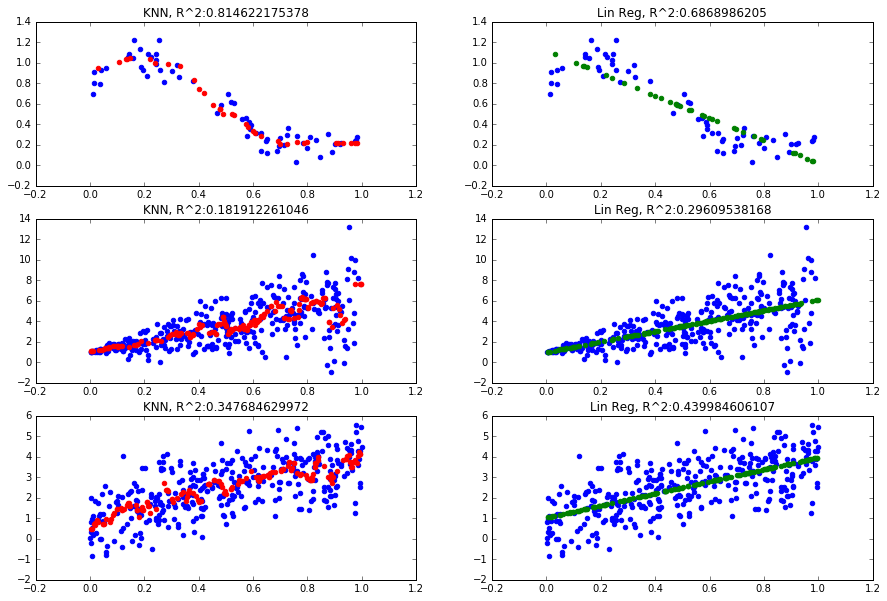

In [6]:
#number of neighbours
k=10

### CODING TIP: You have to generate data for six different datasets, is it a good idea
### to copy and paste the same block of code over and over again for six times? 
### How can you get around this?
### For HW2 it's still ok to copy and paste, for HW3, we will need you to see where functional
### abstraction and iteration are called for and implement them.


#plot predicted points
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))


#Read dataset 1
missing_df = pd.read_csv('./dataset/dataset_1_missing.txt', sep=",", header = 0)
full_df = pd.read_csv('./dataset/dataset_1_full.txt', sep=",", header = 0)

no_y_ind = missing_df[missing_df['y'].isnull()].index
with_y_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                no_y_ind, 
                                with_y_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind)

ax5, ax6 = plot_missing(ax5, 
                        ax6, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k,
                        no_y_ind, 
                        with_y_ind)

#Read dataset 4
missing_df = pd.read_csv('./dataset/dataset_4_missing.txt')
full_df = pd.read_csv('./dataset/dataset_4_full.txt')

no_y_ind = missing_df[missing_df['y'].isnull()].index
with_y_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                no_y_ind, 
                                with_y_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind)

ax1, ax2 = plot_missing(ax1, 
                        ax2, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k,
                        no_y_ind, 
                        with_y_ind)

#Read dataset 6
missing_df = pd.read_csv('./dataset/dataset_6_missing.txt')
full_df = pd.read_csv('./dataset/dataset_6_full.txt')

no_y_ind = missing_df[missing_df['y'].isnull()].index
with_y_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                no_y_ind, 
                                with_y_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind)

ax3, ax4 = plot_missing(ax3, 
                        ax4, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k,
                        no_y_ind, 
                        with_y_ind)

plt.show()

---

## Problem 3: Is the Best (Linear Model) Good Enough?

In this problem, we will specifically look at conditions under which linear regression excels or fails.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

### Part (a): Introduction to Residual Plots

- Read ``dataset_1_full.txt``. Visualize the dataset and make some initial observations.


- For this data set, what can you say about the following linear fits: 

    1. slope = 0.4, intercept = 0.2
    2. slope = 0.4, intercept = 4
    3. linear regression model


- In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values along with  residuals, as well as a residual histogram. What do these plots reveal?  


- Calculate the R^2 coefficient for all three fits. What do the erors reveal? How do they compare to the residual plots?

**Solution:**

[-2.54429006]


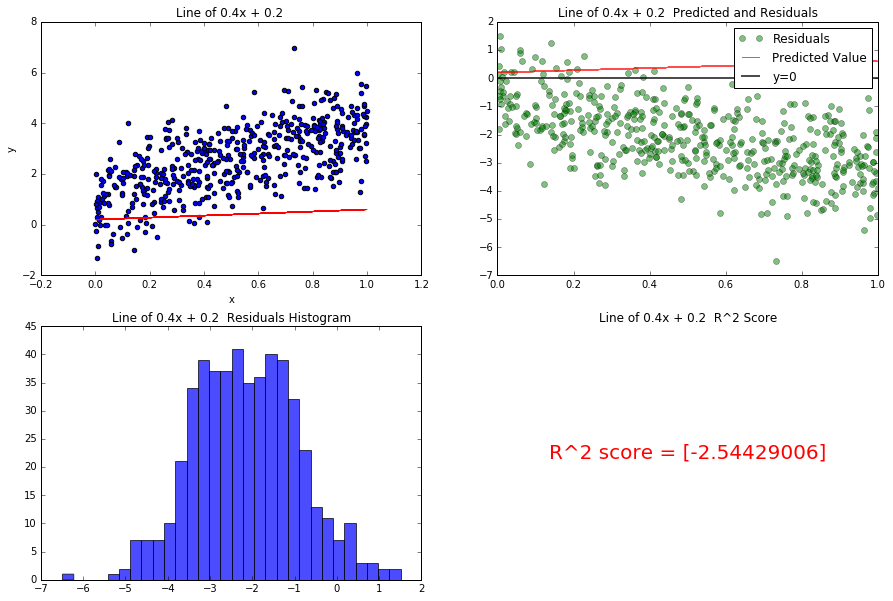

In [99]:
data = pd.read_csv('./dataset/dataset_1_full.txt', sep=",", header = 0)

#plot graphs
def graph_all(X, Y, Y_hat, title, r2):
    
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height

    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_subplot(221)
    ax1.plot(X, Y_hat, color='red')
    ax1.scatter(X, Y)
    ax1.set_title(title)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    #Residuals
    e = Y_hat-Y
    
    ax2 = fig.add_subplot(222)
    ax2.set_title(title+" Predicted and Residuals")
    ax2.plot(X,e, 'go', alpha=0.5, label='Residuals')
    ax2.plot(X,Y_hat, 'red', alpha=0.7, label='Predicted Value')
    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
    ax2.legend()
    
    ax3 = fig.add_subplot(223)
    ax3.hist( e, bins=30, alpha=0.7)
    ax3.set_title(title+" Residuals Histogram")
    
    ax4 = fig.add_subplot(224)
    ax4.set_title(title+" R^2 Score")
    ax4.text(0.5*(left+right), 0.5*(bottom+top), "R^2 score = "+str(r2),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax4.transAxes)
    ax4.axis('off')
    
    fig.show()

#score numpy arrays
def score_np(predicted,actual):
    ymean = actual.mean()
    RSS = 0
    TSS = 0
    index = 0
    for Y_hat in predicted:
        RSS = RSS + ((actual[index]-Y_hat)**2)    
        TSS =  TSS + ((actual[index]-ymean)**2) 
        index = index + 1
    r2 = 1 - RSS/TSS 
    return r2

#numpy data reshaping
Y = data.y.values
Y = Y.reshape((500,1))
X = data.x.values
X = X.reshape((500,1))


title = "Line of 0.4x + 0.2 "
Y_hat = 0.4*X + 0.2
graph_all(X,Y,Y_hat,title,score_np(Y_hat,Y))
print(score_np(Y_hat,Y))

R-squared and Residual plots Analysis

    1. slope = 0.4, intercept = 0.2
        
        The R-Squared value was -2.544 and this represents that model fit of the line is actually worse than fitting a horizontal line on the trend of the data. 
        The residual plots should be centered on 0 and form a range on the fitted values. The residuals should fall into a symmetrical pattern with a constant spread. They should not be predictable
        In this model we could assume that most of the residuals will be negative and that makes it predictable. The histogram is also offset with the middle being approximately -2
        
        Conclusion:
        
        This model is a poor fit to the data provided



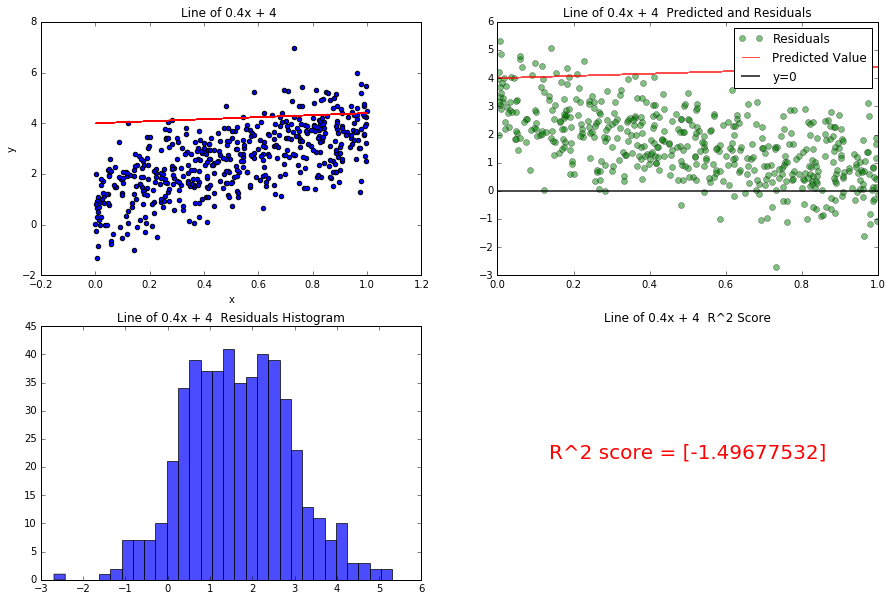

In [102]:
title = "Line of 0.4x + 4 "
Y_hat = 0.4*X + 4
graph_all(X,Y,Y_hat,title,score_np(Y_hat,Y))

    2. slope = 0.4, intercept = 4
    This R-Squared is also negative value of -1.49 and is a worse fit than a horizontal line. 
    The residual plots show a positive predictability and is not symmetrical.
    The histogram again is offset on approximately 1.5
    
    Conclusion:
    This model is also a poor fit to the data.

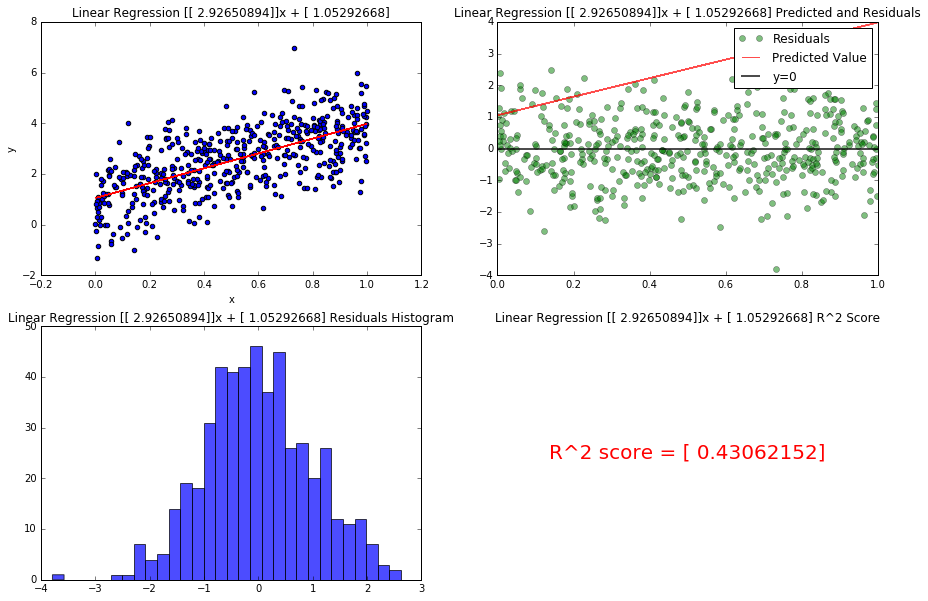

In [101]:
reg =Linear_Regression()
reg.fit(X,Y)
title = "Linear Regression "+str(reg.coef_)+"x + "+str(reg.intercept_)
#print reg.coef_,reg.intercept_
Y_hat=reg.predict(X)
graph_all(X,Y,Y_hat,title,score_np(Y_hat,Y))

    3. linear regression model
    The R-square value was 0.4306 which is a good value between the expected 0 and 1. It represents a good fit with with the data
    The residual plot is consistant and not predictable. The residuals are spread and distributed well from the y=0. line.
    The histogram shows a equal distribution centered on the 0 
    
    Conclusion
    This linear regression of 2.93x + 1.05 is an excellent fit to the data provided.

### Part (b): What do Residual Plots Reveal?

- Read datasets ``dataset_2_full.txt`` through ``dataset_6_full.txt``. In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values along with  residuals, as well as a residual histogram. What do these plots reveal about the fit of the model? 


- Calculate the R^2 coefficient each fit. What do the erors reveal? How do they compare to the residual plots?


- Based on your analysis, form conjectures regarding the precise relationship between the residual plots and the fit of the linear regression model. Conjecture on the precise conditions under which linear regression model is an appropriate model for a given dataset.

**Solution:**

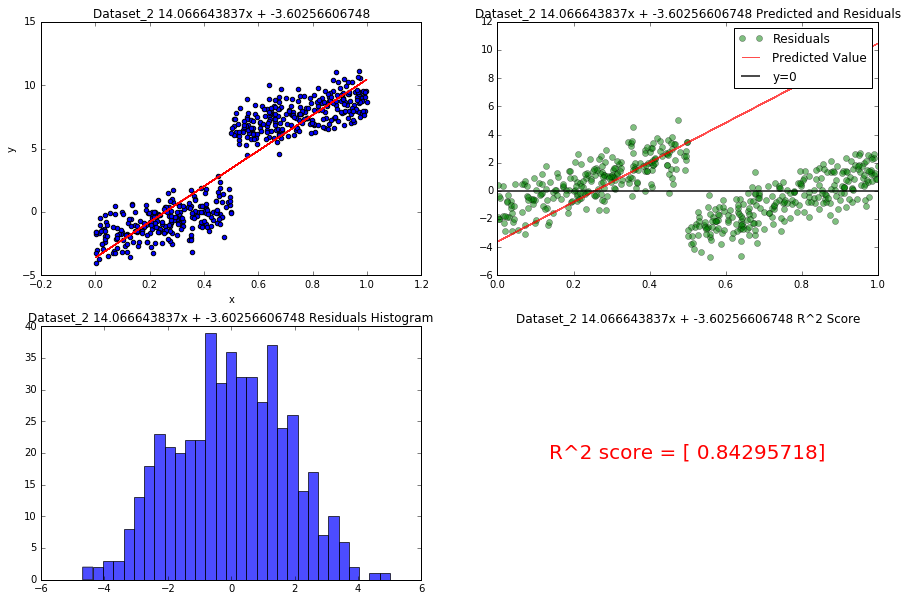

In [115]:
data = pd.read_csv('./dataset/dataset_2_full.txt', sep=",", header = 0)

#numpy data reshaping
Y = data.y.values
Y = Y.reshape((500,1))
X = data.x.values
X = X.reshape((500,1))


title = "Dataset_2"
reg =Linear_Regression()
reg.fit(X,Y)
title = "Dataset_2 "+str(reg.coef_[0][0])+"x + "+str(reg.intercept_[0])
#print reg.coef_,reg.intercept_
Y_hat=reg.predict(X)
graph_all(X,Y,Y_hat,title,score_np(Y_hat,Y))

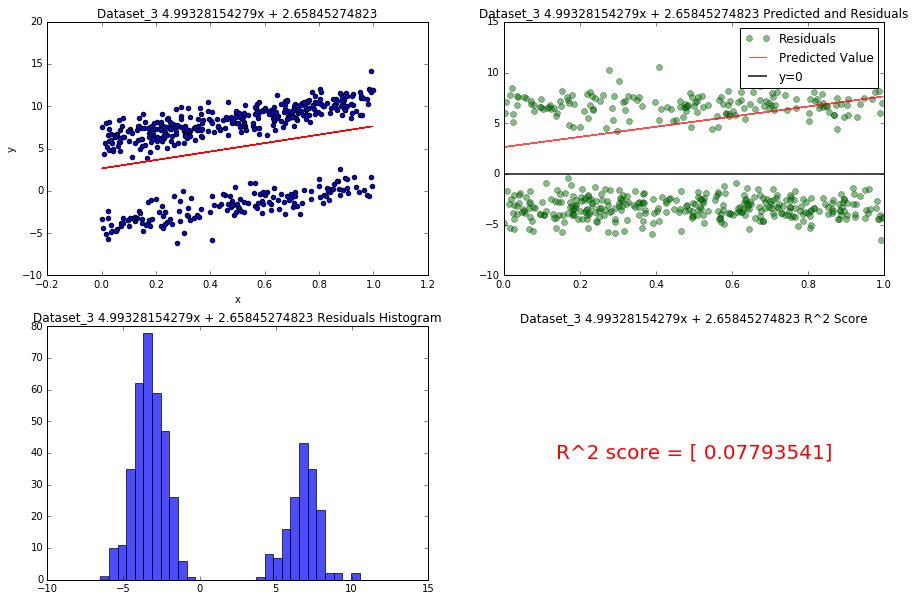

In [116]:
data = pd.read_csv('./dataset/dataset_3_full.txt', sep=",", header = 0)

#numpy data reshaping
Y = data.y.values
Y = Y.reshape((500,1))
X = data.x.values
X = X.reshape((500,1))


title = "Dataset_3"
reg =Linear_Regression()
reg.fit(X,Y)
title = "Dataset_3 "+str(reg.coef_[0][0])+"x + "+str(reg.intercept_[0])
#print reg.coef_,reg.intercept_
Y_hat=reg.predict(X)
graph_all(X,Y,Y_hat,title,score_np(Y_hat,Y))

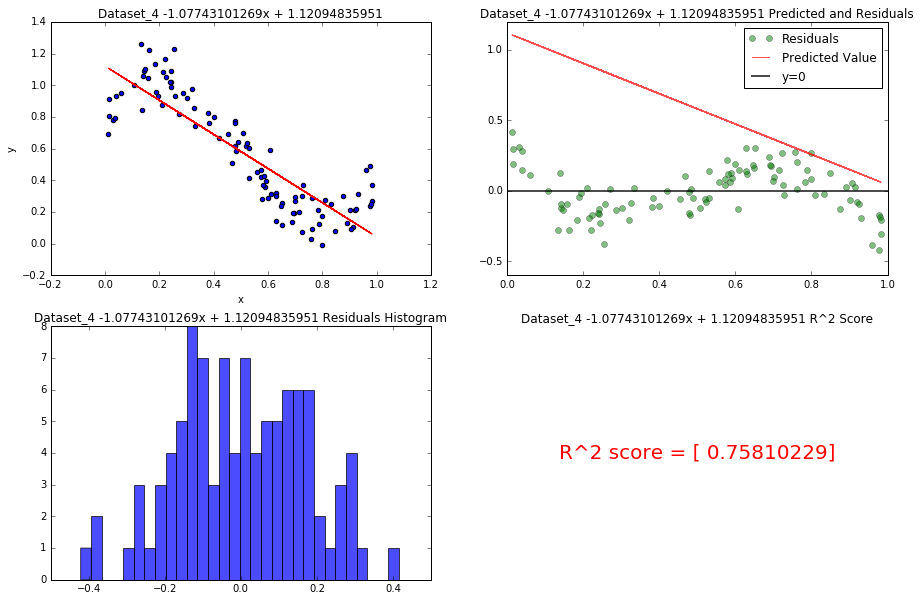

In [117]:
data = pd.read_csv('./dataset/dataset_4_full.txt', sep=",", header = 0)

#numpy data reshaping
Y = data.y.values
Y = Y.reshape((len(Y),1))
X = data.x.values
X = X.reshape((len(Y),1))


title = "Dataset_4"
reg =Linear_Regression()
reg.fit(X,Y)
title = "Dataset_4 "+str(reg.coef_[0][0])+"x + "+str(reg.intercept_[0])
#print reg.coef_,reg.intercept_
Y_hat=reg.predict(X)
graph_all(X,Y,Y_hat,title,score_np(Y_hat,Y))

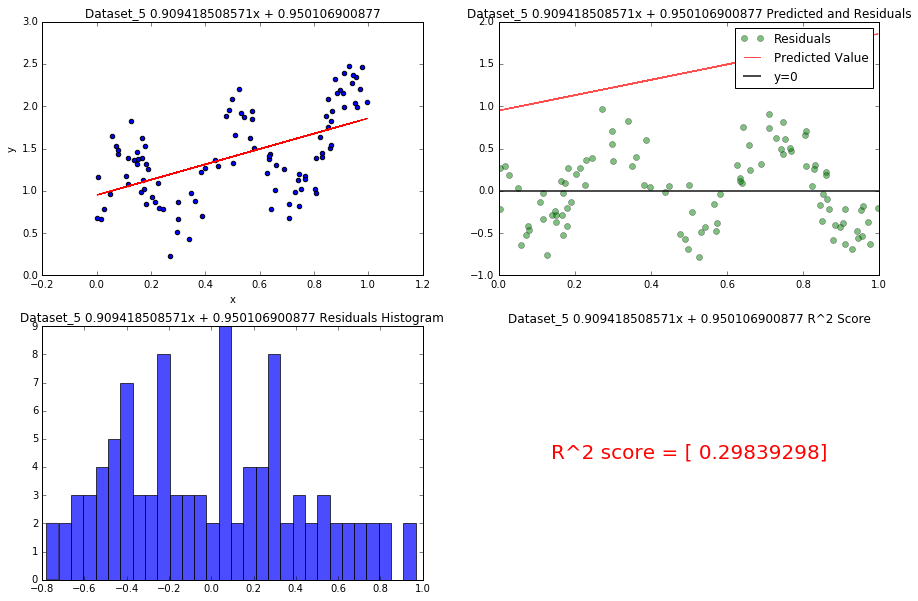

In [118]:
data = pd.read_csv('./dataset/dataset_5_full.txt', sep=",", header = 0)

#numpy data reshaping
Y = data.y.values
Y = Y.reshape((len(Y),1))
X = data.x.values
X = X.reshape((len(Y),1))


title = "Dataset_5"
reg =Linear_Regression()
reg.fit(X,Y)
title = "Dataset_5 "+str(reg.coef_[0][0])+"x + "+str(reg.intercept_[0])
#print reg.coef_,reg.intercept_
Y_hat=reg.predict(X)
graph_all(X,Y,Y_hat,title,score_np(Y_hat,Y))

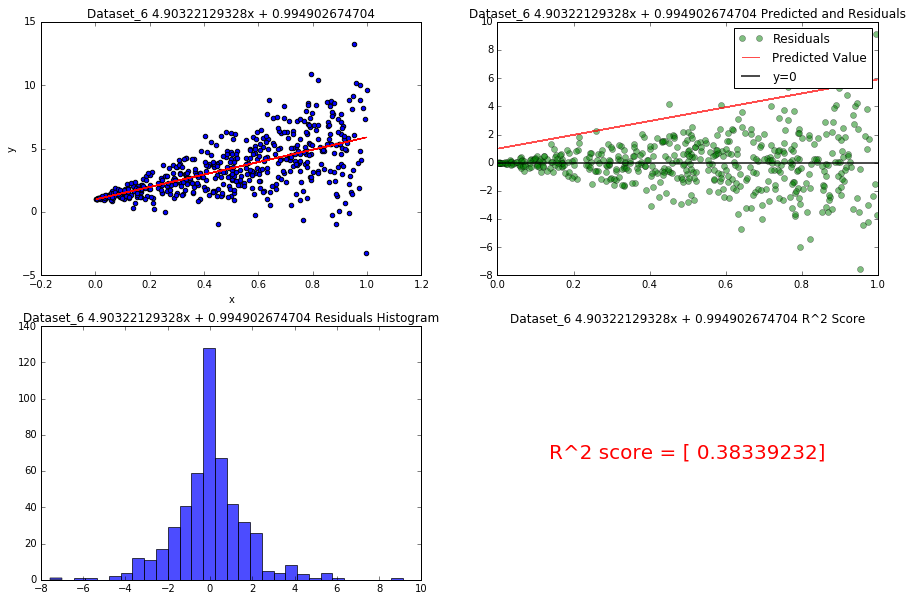

In [119]:
data = pd.read_csv('./dataset/dataset_6_full.txt', sep=",", header = 0)

#numpy data reshaping
Y = data.y.values
Y = Y.reshape((len(Y),1))
X = data.x.values
X = X.reshape((len(Y),1))


title = "Dataset_6"
reg =Linear_Regression()
reg.fit(X,Y)
title = "Dataset_6 "+str(reg.coef_[0][0])+"x + "+str(reg.intercept_[0])
#print reg.coef_,reg.intercept_
Y_hat=reg.predict(X)
graph_all(X,Y,Y_hat,title,score_np(Y_hat,Y))

---

## Challenge Problem: Combining Random Variables

This problem, we explore the distirbution of random variables that result from combining other random variables.

### Part (a): Adding Two Uniformly Distributed Variables

Consider the independent random variables $X\sim U(0, 1)$ and $Y\sim U(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

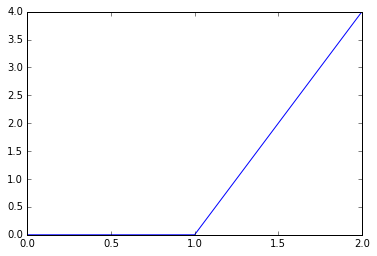

In [125]:
from numpy.random import uniform
from numpy import ceil,convolve,histogram,sqrt
from pylab import hist,plot,show

n = 2

x,y = uniform(0,1),uniform(0,1)

bins = ceil(sqrt(n))

pdf_x = histogram(x,bins=bins,normed=True)
pdf_y = histogram(y,bins=bins,normed=True)

s = convolve(pdf_x[0],pdf_y[0])

plot(s)
show()

### Part (b): Adding Multiple Uniformly Distributed Variables

Consider three independent random variables $X_1, X_2, X_3 \sim U(0, 1)$. Let $Z$ be the random variable $Z = X_1 + X_2 + X_3$. 

What is the distribution of $Z$? What if you add 10 or 12 independent (standard) uniformly distributed variables? Conjecture on the distribution of 
$$
Z = \lim_{n\to \infty} \sum_{i=1}^n X_i
$$
where $\left\{X_i \right\}$ are independent (standard) uniformly distributed variables.

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

### Part (c): Combining Normally Distributed Variables

Consider the independent random variables $X\sim \mathcal{N}(0, 1)$ and $Y\sim \mathcal{N}(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** use properties of expected value and some experimentation.

**Solution:**

### Part (d): Product of Normally Distributed Variables

Is the product of two normally distributed variables a normally distributed variable? You should fully explain and support your conlusion. 

**Solution:**

---